# Metallicity Histogram for Kinematic Data & Gaia xgboost

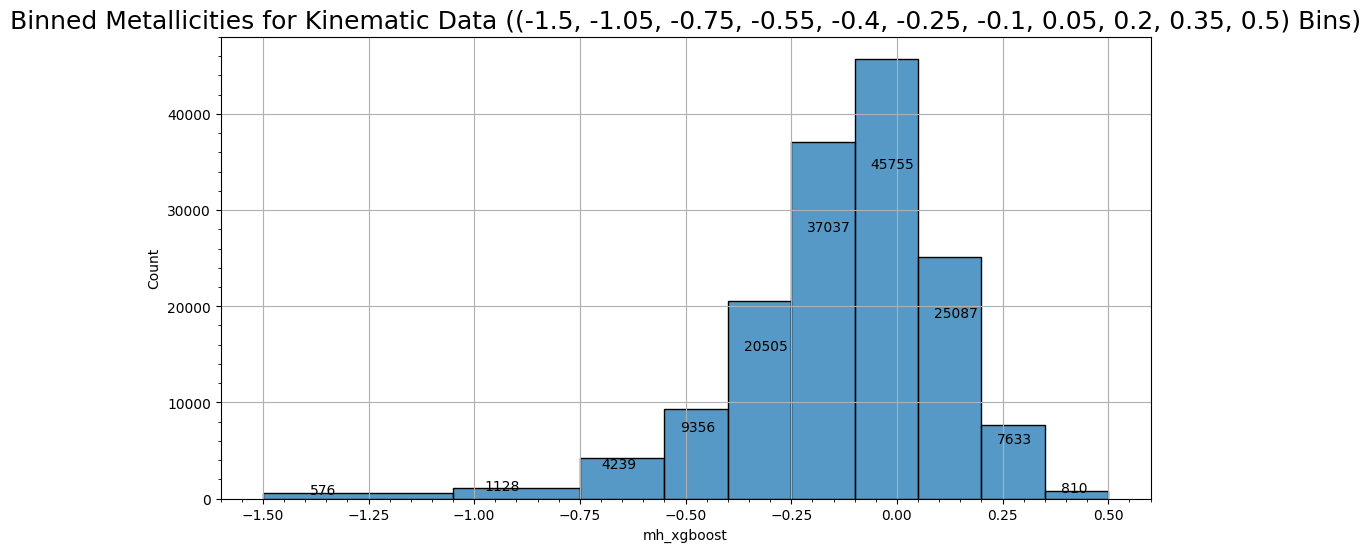

Counts:  [  576  1128  4239  9356 20505 37037 45755 25087  7633   810]
Bin Edges:  [-1.5  -1.05 -0.75 -0.55 -0.4  -0.25 -0.1   0.05  0.2   0.35  0.5 ]


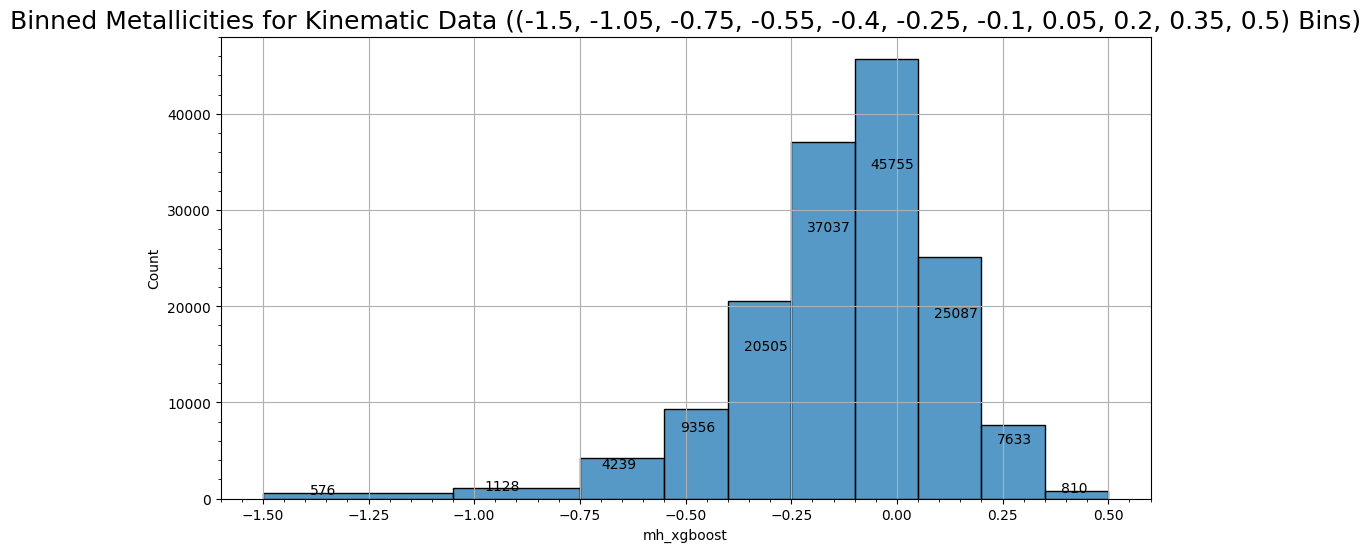

In [1]:
import plotting
import datamanip
from matplotlib import patches

def nokinematichistogram(n, left, right):
    csv = 'tempcsv/prot_nokinematic_xgboost.csv'
    x = 'mh_xgboost'
    title = f'Binned Metallicities for Non-Kinematic Data ({n} Bins)'

    return plotting.histogram(csv, x, nbins=n, title=title, figsize=(12,6), binrange=[left, right])


def kinematichistogram(n, left, right):
    # used to create data file with xgboost metallicities
    # fix.writecsv('table-1.csv', 'All_prot_kin.csv', 'source_id', 'source_id', 'tempcsv/prot_kinematic_xgboost.csv')

    csv = 'tempcsv/prot_kinematic_xgboost.csv'
    x = 'mh_xgboost'
    title = f'Binned Metallicities for Kinematic Data ({n} Bins)'

    return plotting.histogram(csv, x, nbins=n, title=title, figsize=(12,6), binrange=[left,right])

n = (-1.5, -1.05, -0.75, -0.55, -0.40, -0.25, -0.10, 0.05, 0.20, 0.35, 0.5)

ax, (counts, binedges) = kinematichistogram(n, -1.5, 0.5)
binedges = binedges.round(3)
plotting.addhistcounts(ax, counts)
plotting.plt.savefig('plots/kinematicplots/metallicitybin_hist.png')
plotting.plt.show()

print('Counts: ', counts)
print('Bin Edges: ', binedges)


axs, (countss, binedgess) = kinematichistogram(n, -1.5, 0.5)
binedgess = binedges.round(3)
plotting.addhistcounts(axs, countss)
plotting.plt.show()


# Boxplots with New Metallicity Bins

## Plotting Examples

### Prot vs. bp-rp

In [2]:
csv = 'tempcsv/prot_kinematic_xgboost.csv'
x = 'bp_rp'
y = 'Prot'
hue = 'mh_xgboost'
xbin = [0.587, 0.719, 0.823, 1.01, 1.43]
xbinlabel = [f'{xbin[i]}-{xbin[i+1]}' for i in range(len(xbin) -1)]
huebin = binedges
huebinlabel = [f'{huebin[i]}-{huebin[i+1]}' for i in range(len(huebin)-1)]
palette = 'crest'
title = 'Prot vs. bp_rp for Kinematic Data'
destination = 'plots/kinematicplots/prot_ci_wholerange.png'

df = datamanip.readcsv(csv, x, hue, xbin, xbinlabel, huebin, huebinlabel)
ax = plotting.boxplotdf(df, x, y, hue, xbinlabel, huebinlabel, palette, title, show=False)
counts = datamanip.findbincounts(df, x, hue)

plotting.addboxcounts(ax, counts, size='xx-small')
plotting.plt.savefig(destination)
plotting.plt.show()


TypeError: Index(...) must be called with a collection of some kind, 'mh_xgboost' was passed

### Prot vs. Teff

/Users/livelaplove/python/SURP-2025/metallicity/datamanip.py:137: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby(by=[subbin, upperbin]).size().reset_index(name='counts')


StatisticsError: stdev requires at least two data points

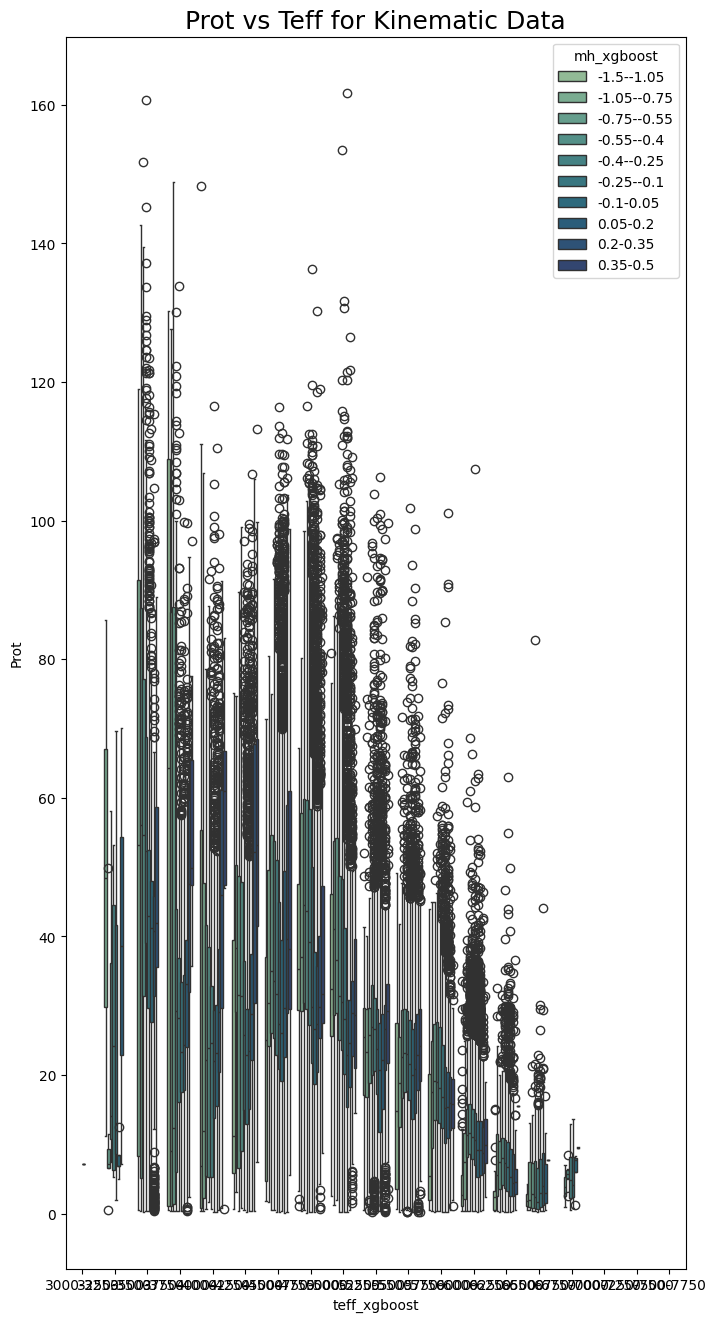

In [ ]:
x = 'teff_xgboost'
xbin = tuple(i for i in range(3000, 8000, 250))
xbinlabel = [f'{xbin[i]}-{xbin[i+1]}' for i in range(len(xbin)-1)]

df = datamanip.readcsv(csv, x, hue, xbin, xbinlabel, huebin, huebinlabel)
title = 'Prot vs Teff for Kinematic Data'
destination = 'plots/kinematicplots/prot_teff_wholerange.png'
ax = plotting.boxplotdf(df, x, y, hue, xbinlabel, huebinlabel, palette, title, show=False)
counts = datamanip.findbincounts(df, x, hue)

vzdisps = datamanip.calcvzdisp(df, huebinlabel, x, xbinlabel)
vzdisps

plotting.addboxcounts(ax, counts, size='xx-small')
plotting.plt.savefig(destination)
plotting.plt.show()


# Calculating Vertical Velocity Dispersion per Metallicity Bin

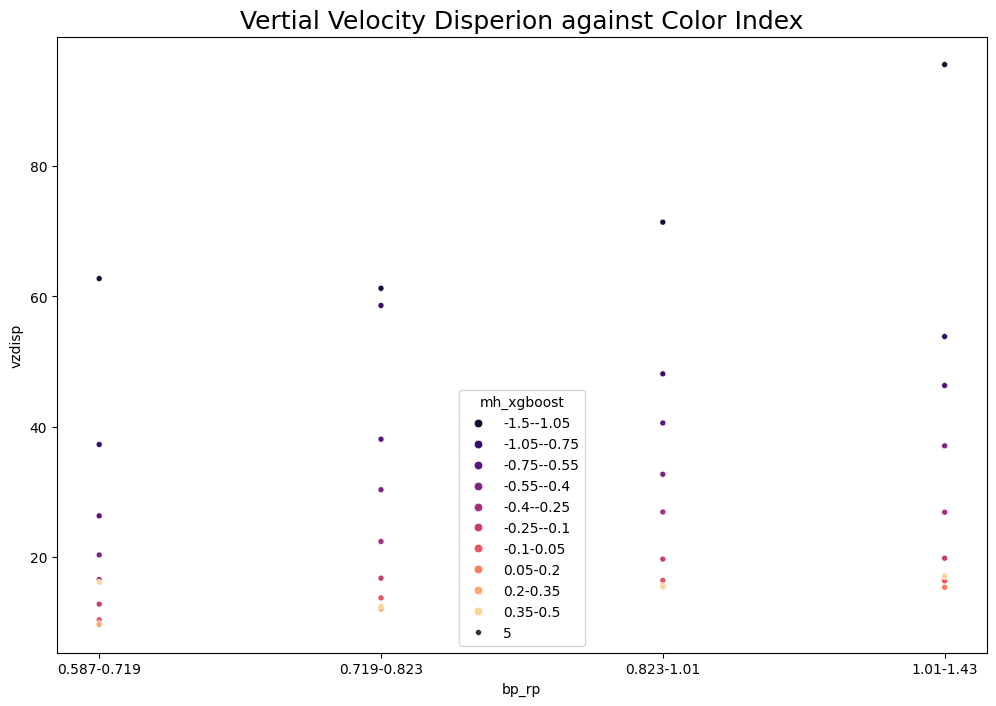

In [ ]:
csv = 'tempcsv/prot_kinematic_xgboost.csv'
x = 'bp_rp'
y = 'vzdisp'
hue = 'mh_xgboost'
xbin = [0.587, 0.719, 0.823, 1.01, 1.43]
xbinlabel = [f'{xbin[i]}-{xbin[i+1]}' for i in range(len(xbin) -1)]
huebin = binedges
huebinlabel = [f'{huebin[i]}-{huebin[i+1]}' for i in range(len(huebin)-1)]
palette = 'magma'
title = 'Vertial Velocity Disperion against Color Index'

df = datamanip.readcsv(csv, x, xbin, xbinlabel, hue, huebin, huebinlabel)
df = datamanip.calcvzdisp(df, huebinlabel, x, xbinlabel)
ax = plotting.scatterplot(df, x, y, hue, huebinlabel, title, palette=palette, show=True, figsize=(12, 8))


# Scatter Plots

## No Temperature Bins

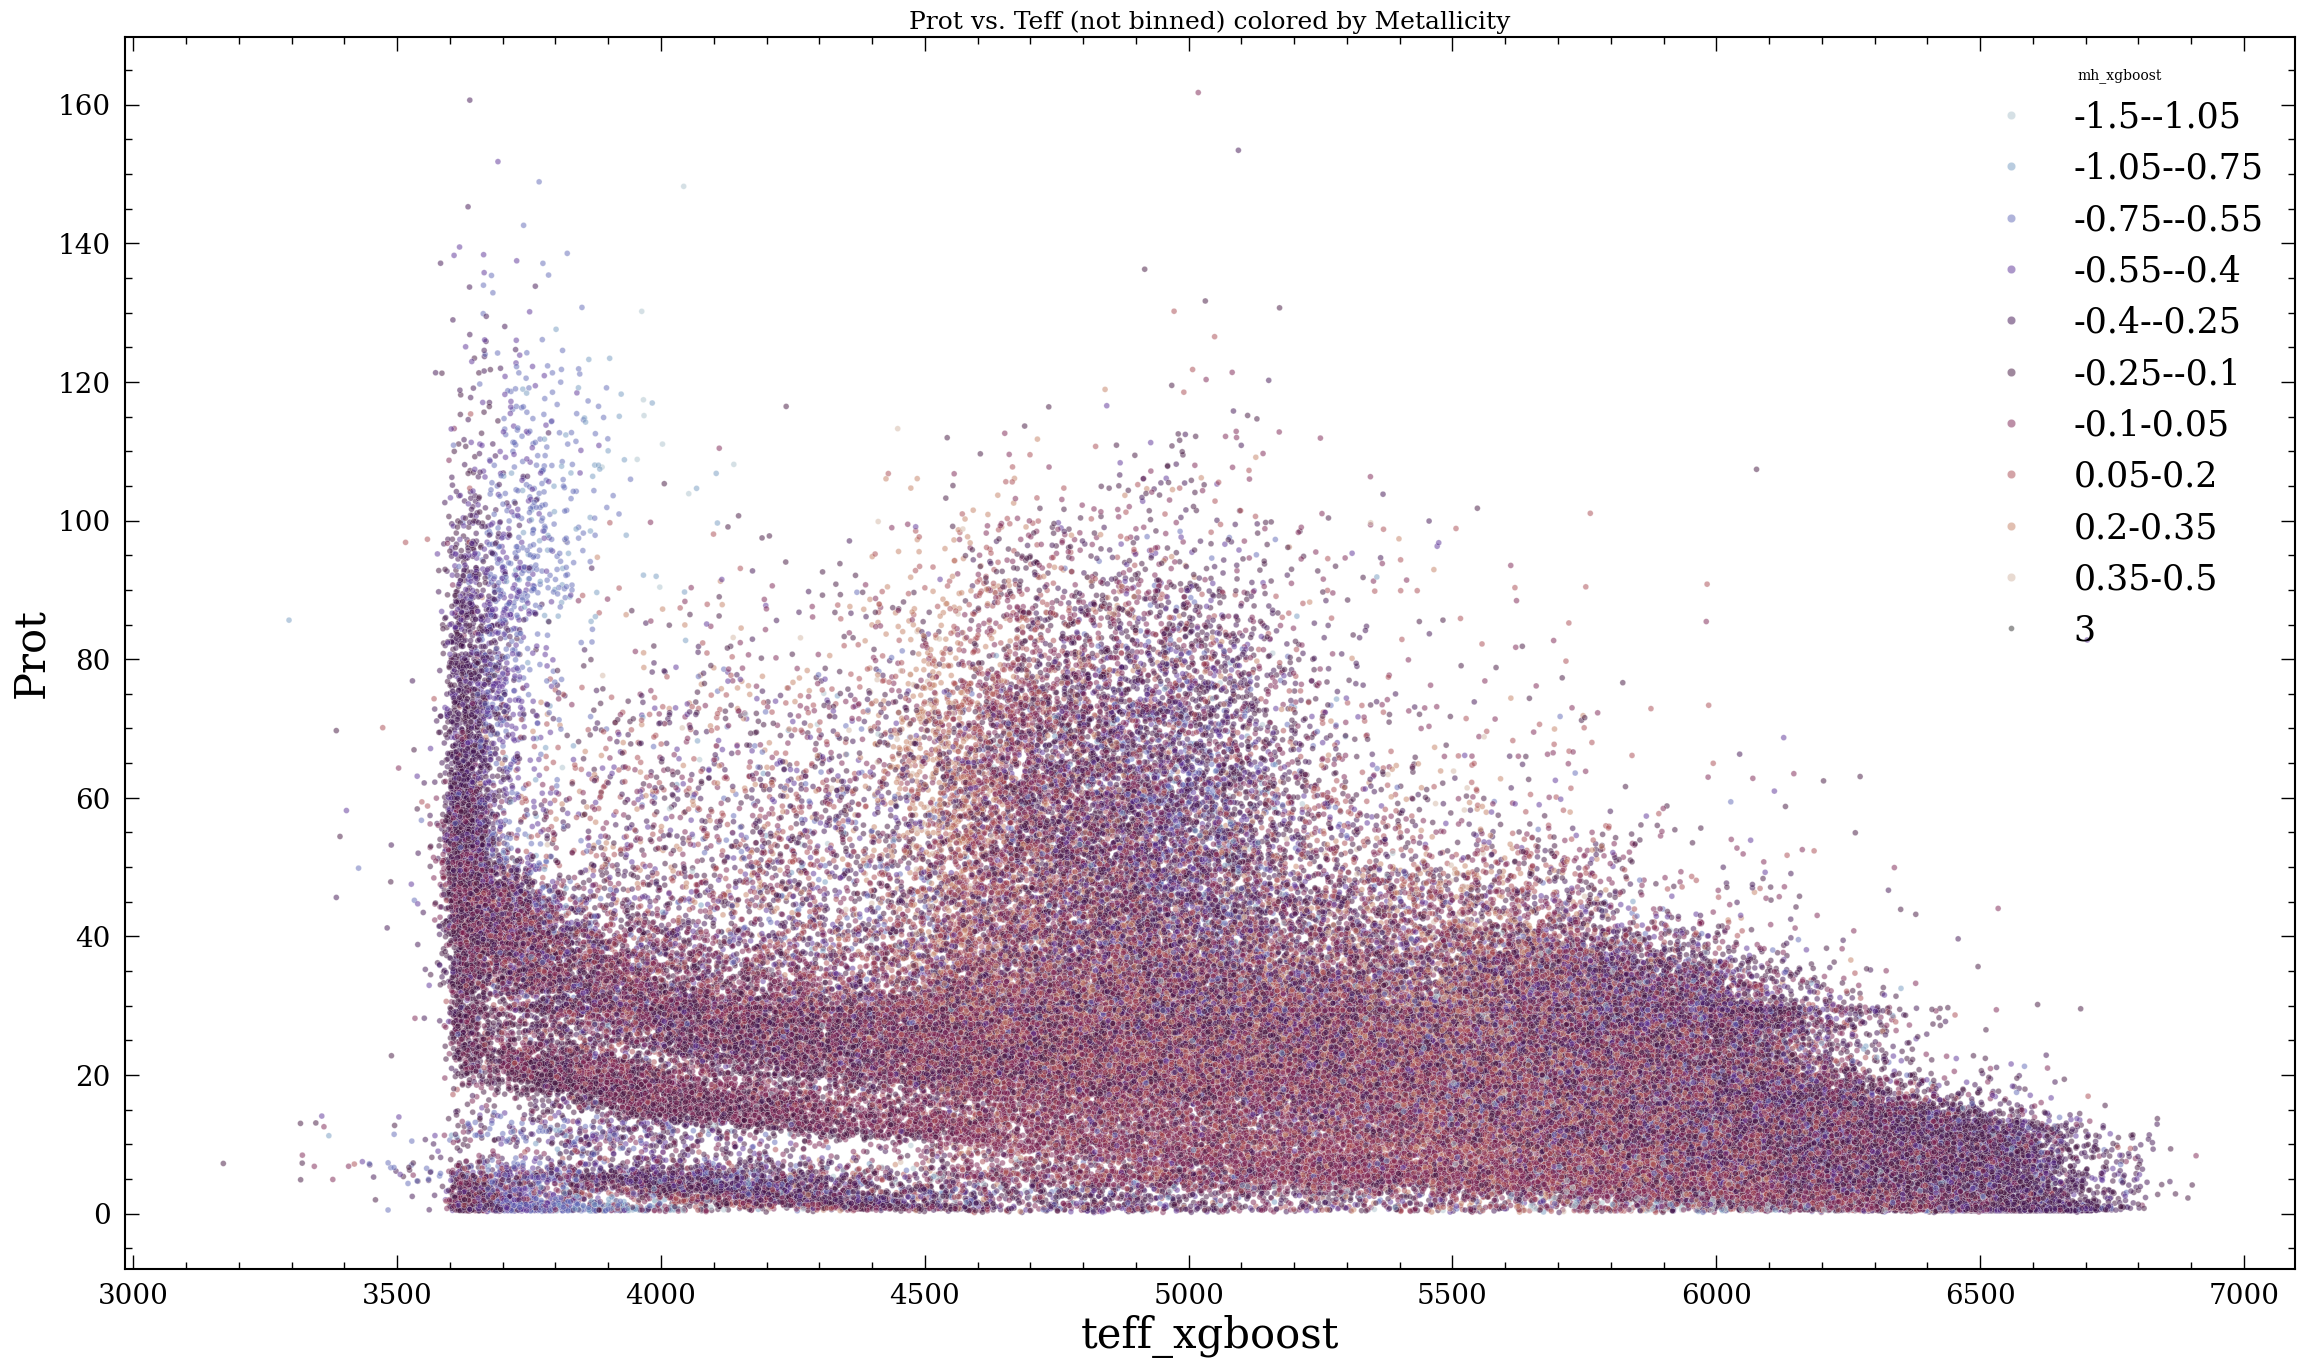

In [ ]:
import datamanip
import plotting

plotting.plotparams()

csv = 'tempcsv/prot_kinematic_xgboost.csv'
x = 'teff_xgboost'
y = 'Prot'
hue = 'mh_xgboost'
huebin = (-1.5, -1.05, -0.75, -0.55, -0.40, -0.25, -0.10, 0.05, 0.20, 0.35, 0.5)
huebinlabel = [f'{huebin[i]}-{huebin[i+1]}' for i in range(len(huebin) - 1)]
palette = 'twilight'
title = 'Prot vs. Teff (not binned) colored by Metallicity'

df = datamanip.readcsv(csv, hue, huebin, huebinlabel)
ax = plotting.scatterplot(df, x, y, hue, huebinlabel, title, palette, True, (28, 16))


## With Temperature Bins (per 250K)

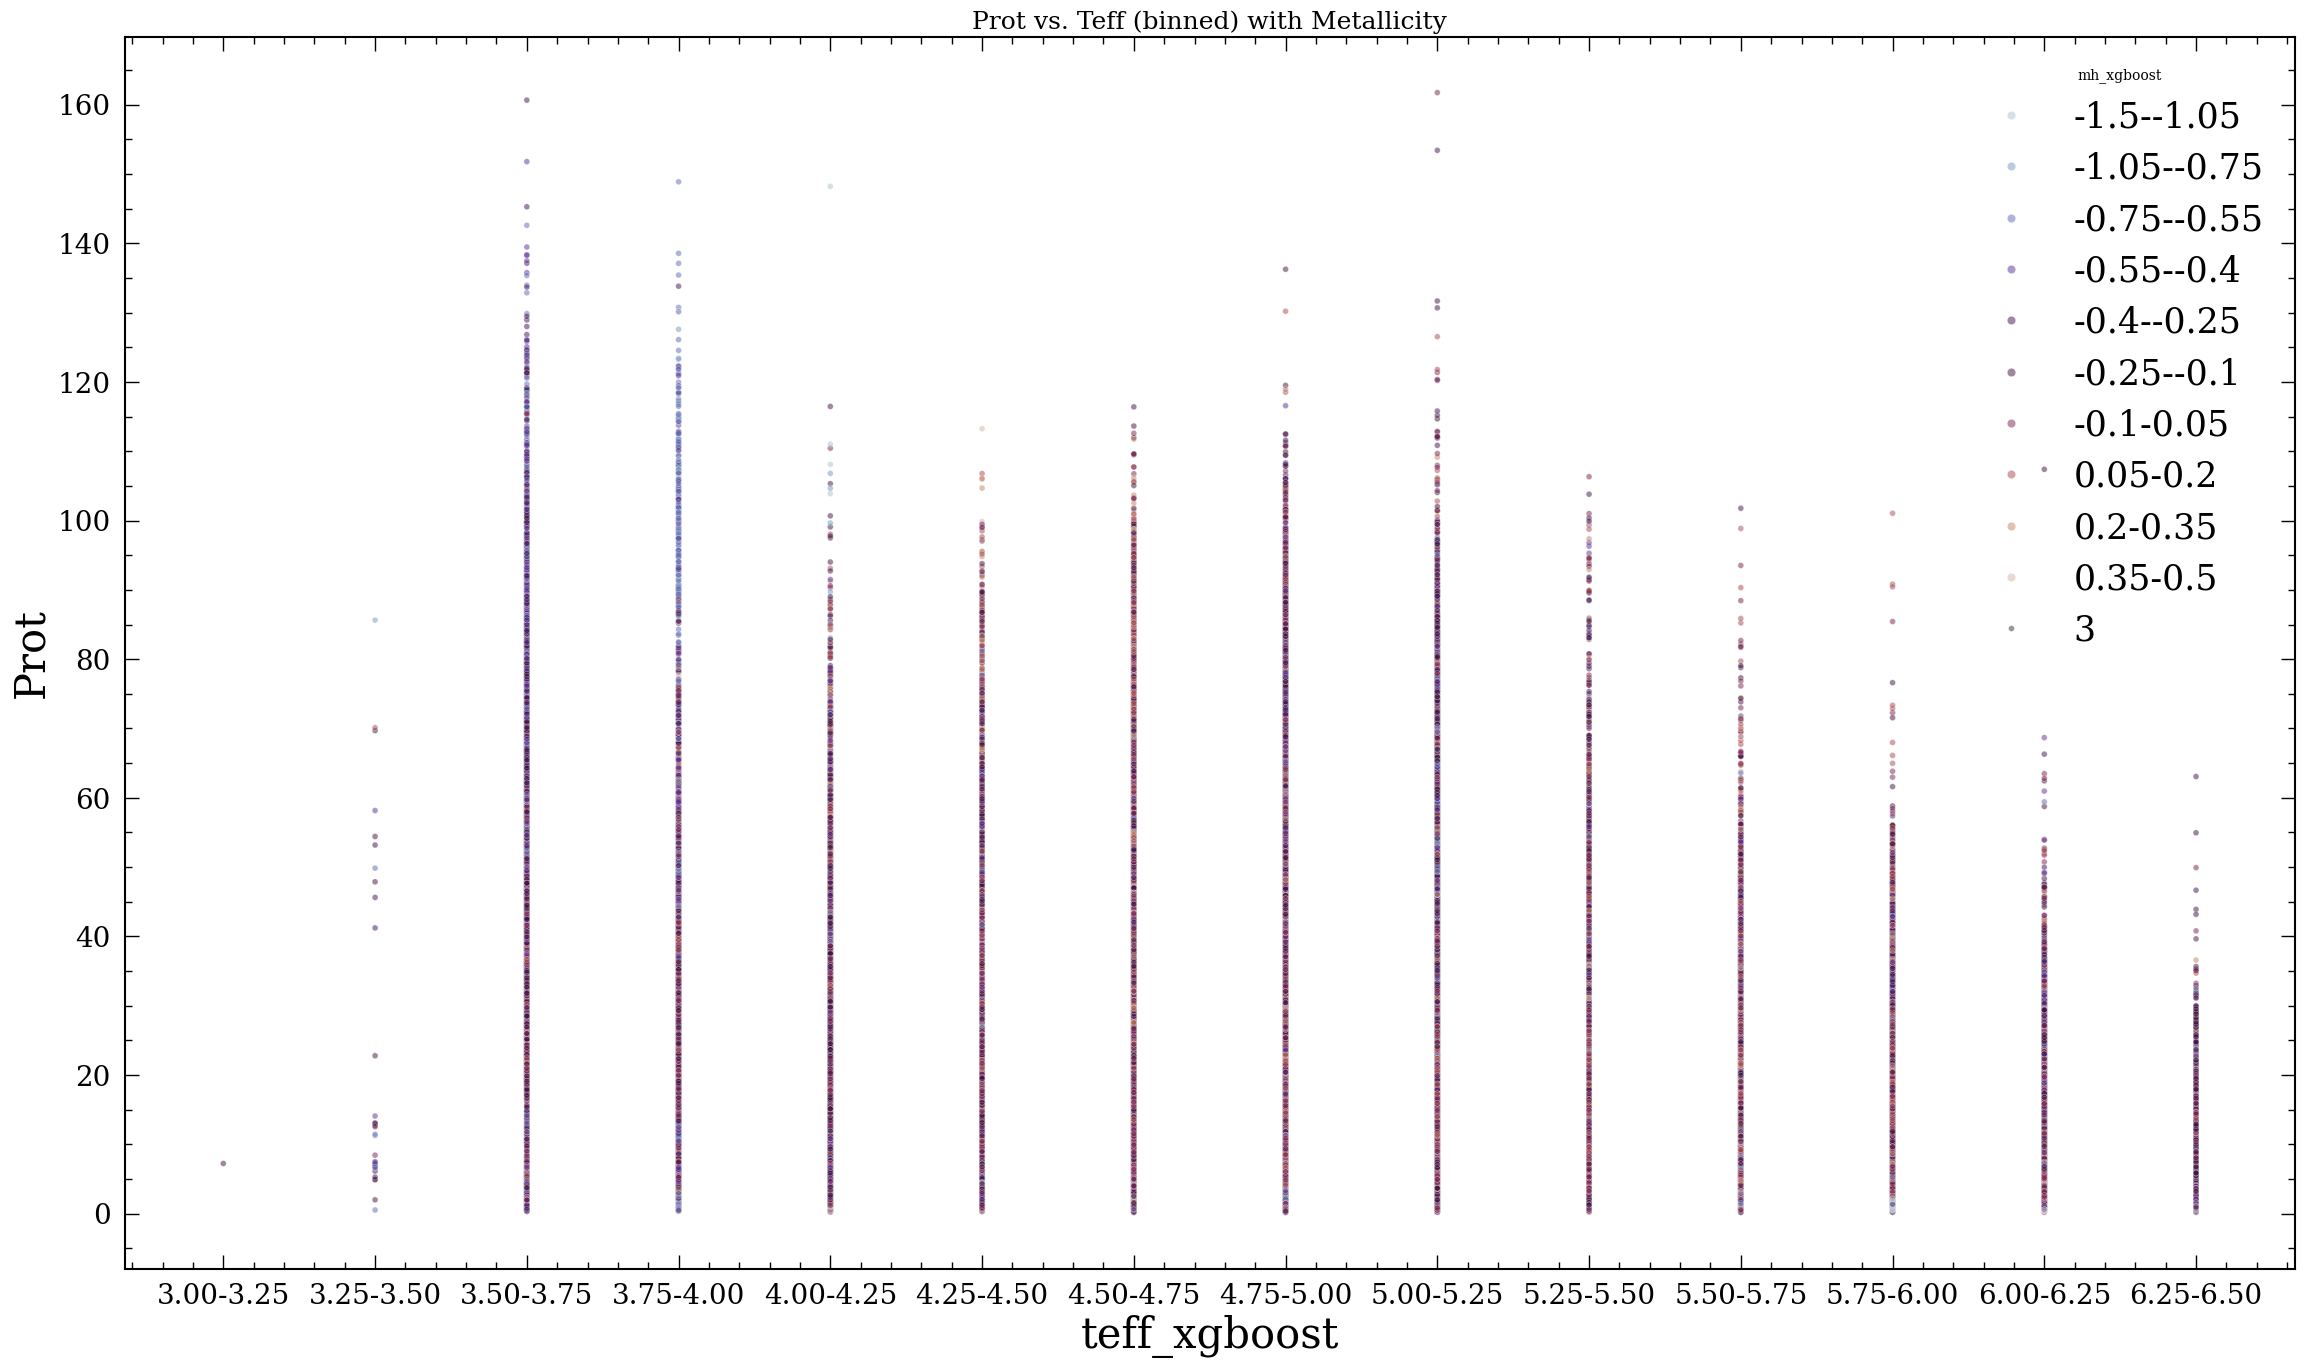

In [ ]:
xbin = tuple(range(3000, 6750, 250))
xbinlabel = [f'{xbin[i]/1000:.2f}-{xbin[i+1]/1000:.2f}' for i in range(len(xbin) - 1)]
title = 'Prot vs. Teff (binned) with Metallicity'

df = datamanip.readcsv(csv, x, hue, xbin, xbinlabel, huebin, huebinlabel)
ax = plotting.scatterplot(df, x, y, hue, huebinlabel, title, palette, show=True, figsize=(28, 16))